In [ ]:
'''
note :

'''

###################################################################################
import os
import dir_info
di = dir_info.Info()
main_dir = di.main_dir
prep_dir = di.prep_dir 					# \1_preprocessing
model_dir = di.model_dir 				# \2_model
module_dir = di.module_dir 				# \module
facility_dir = di.facility_dir			# \facility
plot_dir = di.plot_dir					# \plot
cluster_dir = di.cluster_dir 			# \0_temp_dir(clustering)
facility_list = di.facility_list_merge		#['업무시설', '판매및숙박', '문화시설', '교육시설']

import model_library as lib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False
import os

# subplot numbers
num_0 = [1, 2, 5, 6]
num_1 = [3, 4, 7, 8]
num_2 = [9, 10, 13, 14]
num_3 = [11, 12, 15, 16]
	
hours_ex = []
for i in range(1, 49) :
	hours_ex.append(i)

line_1 = 22.5
line_2 = 45.5
	
# make model3_model4 plot

model3_dir = facility_dir + '\\model3_cluster'
model4_dir = facility_dir + '\\model4'

fig = plt.figure(figsize = (40, 40))

for num, fc in enumerate(facility_list) :
	print(f'{fc} working ...')
	
	fc_dir = model3_dir + f'\\{fc}'
	os.chdir(fc_dir)
	pf48_g0 = lib.read_excel('profile_48_group_0.xlsx')
	pf48_g1 = lib.read_excel('profile_48_group_1.xlsx')
	
	pf48_g0.columns = pf48_g0.columns.astype(str)
	pf48_g1.columns = pf48_g1.columns.astype(str)
		
	os.chdir(model4_dir + f'\\{fc}' + '\\group_0_model4')
	g0_m4_day = lib.read_excel('model4_weekdays.xlsx')
	g0_m4_end = lib.read_excel('model4_weekends.xlsx')
	g0_m4_day.columns = g0_m4_day.columns.astype(str)
	g0_m4_end.columns = g0_m4_end.columns.astype(str)
	
	os.chdir(model4_dir + f'\\{fc}' + '\\group_1_model4')
	g1_m4_day = lib.read_excel('model4_weekdays.xlsx')
	g1_m4_end = lib.read_excel('model4_weekends.xlsx')
	g1_m4_day.columns = g1_m4_day.columns.astype(str)
	g1_m4_end.columns = g1_m4_end.columns.astype(str)
	
	print('\tall loaded')
	
	check = 0 # group num 'un'matches for model3 and model4
	for names in g0_m4_day.loc[:, 'excel'] :
		if pf48_g0.loc[0, 'excel'] in names :
			check = 1 # group num matches for model3 and model4

	if check == 0 : # switch model4 0th with 1st
		temp = g0_m4_day.copy()
		g0_m4_day = g1_m4_day
		g1_m4_day = temp
		
		temp = g0_m4_end.copy()
		g0_m4_end = g1_m4_end
		g1_m4_end = temp
		temp = None
		print('\t0th -> 1st')	
	else :
		print('\tmatched')	
		
		
	# subplot add
	ax0_m3 = fig.add_subplot(4, 4, locals()[f'num_{num}'][0])
	ax1_m3 = fig.add_subplot(4, 4, locals()[f'num_{num}'][1])
	
	ax0_m4 = fig.add_subplot(4, 4, locals()[f'num_{num}'][2])
	ax1_m4 = fig.add_subplot(4, 4, locals()[f'num_{num}'][3])
	
	
	# plot 
	
	flierprops = dict(marker='o', markerfacecolor='g', markersize= 2 ,\
					linestyle='none', markeredgecolor='dimgrey')
	xticks_6 = [6, 12, 18, 24, 30, 36, 42, 48]
	xticks_48 = []
	for i in range(1, 49) :
		xticks_48.append(i)
		
	print('\tplot start')
		# model 3 group_0
	for i in range(pf48_g0.shape[0]) :
		ax0_m3.plot(hours_ex, pf48_g0.loc[i, '1' : '48'], alpha = 1)
		
	for i in range(pf48_g1.shape[0]) :
		ax1_m3.plot(hours_ex, pf48_g1.loc[i, '1' : '48'], alpha = 1)	
	
	ax0_m3.plot([24, 24], [-2, 2], color = 'dimgrey') 
	ax0_m3.plot([48, 48], [-2, 2], color = 'dimgrey')
	ax0_m3.text(line_1, 0.17, 'weekdays', rotation = 90, color = 'dimgrey')
	ax0_m3.text(line_2 + 1, 0.17, 'weekends', rotation = 90, color = 'dimgrey')
	
	ax1_m3.plot([24, 24], [-2, 2], color = 'dimgrey') 
	ax1_m3.plot([48, 48], [-2, 2], color = 'dimgrey')
	ax1_m3.text(line_1, 0.17, 'weekdays', rotation = 90, color = 'dimgrey')
	ax1_m3.text(line_2 + 1, 0.17, 'weekends', rotation = 90, color = 'dimgrey')
	
	ax0_m3.set_xlim([1, 48])
	ax0_m3.set_ylim([0, 0.2])
	ax0_m3.set_title('{}_{}_model3'.format(fc, '0'))
	ax0_m3.set_xlabel('hours')
	ax0_m3.set_xticks(xticks_6)
	ax0_m3.grid()
	
	ax1_m3.set_xlim([1, 48])
	ax1_m3.set_ylim([0, 0.2])
	ax1_m3.set_title('{}_{}_model3'.format(fc, '1'))
	ax1_m3.set_xlabel('hours')
	ax1_m3.set_xticks(xticks_6)
	ax1_m3.grid()
	print('\tmodel3 plot end')
	
	
		# model 4 group_0
	for i in range(1, 49) :
		if i < 25 : # plot from weekday df
			temp = ax0_m4.boxplot(g0_m4_day.loc[:, f'{i}'], positions = [i], flierprops = flierprops)
		else :
			temp = ax0_m4.boxplot(g0_m4_end.loc[:, f'{i - 24}'], positions = [i], flierprops = flierprops)
	ax0_m4.set_xlabel('hours')
	ax0_m4.set_title('{}_{}_model4'.format(fc, '0'))
	
	ax0_m4.plot([24, 24], [-2, 2], color = 'dimgrey') 
# 	ax0_m4.plot([48, 48], [-2, 2], color = 'dimgrey')
	ax0_m4.text(line_1, 0.8, 'weekdays', rotation = 90, color = 'dimgrey')
	ax0_m4.text(line_2 + 2, 0.8, 'weekends', rotation = 90, color = 'dimgrey')
	ax0_m4.set_xticklabels(xticks_48, rotation = 90)
	
	ax0_m4.set_xlim([0, 49])
	ax0_m4.set_ylim([-0.2, 1])
	ax0_m4.grid()


		# model 4 group_1
	for i in range(1, 49) :
		if i < 25 : # plot from weekday df
			temp = ax1_m4.boxplot(g1_m4_day.loc[:, f'{i}'], positions = [i], flierprops = flierprops)
		else :
			temp = ax1_m4.boxplot(g1_m4_end.loc[:, f'{i - 24}'], positions = [i], flierprops = flierprops)
	ax1_m4.set_xlabel('hours')
	ax1_m4.set_title('{}_{}_model4'.format(fc, '1'))
	
	ax1_m4.plot([24, 24], [-2, 2], color = 'dimgrey') 
# 	ax1_m4.plot([48, 48], [-2, 2], color = 'dimgrey')
	ax1_m4.text(line_1, 0.8, 'weekdays', rotation = 90, color = 'dimgrey')
	ax1_m4.text(line_2 + 2, 0.8, 'weekends', rotation = 90, color = 'dimgrey')
	ax1_m4.set_xticklabels(xticks_48, rotation = 90)
	
	ax1_m4.set_xlim([0, 49])
	ax1_m4.set_ylim([-0.2, 1])
	ax1_m4.grid()
	print('\tmodel4 plot end')


os.chdir(plot_dir)
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
fig.suptitle("Model 3 & Model 4 for all Facilities", fontsize = 40)
plt.savefig('model_3_4_wide.png', dpi = 400)
plt.show()



In [1]:
'''
note :

'''

###################################################################################
import os
import dir_info
di = dir_info.Info()
main_dir = di.main_dir
prep_dir = di.prep_dir 					# \1_preprocessing
model_dir = di.model_dir 				# \2_model
module_dir = di.module_dir 				# \module
facility_dir = di.facility_dir			# \facility
plot_dir = di.plot_dir					# \plot
cluster_dir = di.cluster_dir 			# \0_temp_dir(clustering)
facility_list = di.facility_list_merge		#['업무시설', '판매및숙박', '문화시설', '교육시설']

import model_library as lib
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt




model3_dir = facility_dir + '\\model3_cluster'
model4_dir = facility_dir + '\\model4'

hours_str = []
for i in range(1, 49) :
    hours_str.append(str(i))

for num, fc in enumerate(facility_list) :
    if num == 0 :
        print(f'{fc} working ...')

        fc_dir = model3_dir + f'\\{fc}'
        os.chdir(fc_dir)
        pf48_g0 = lib.read_excel('profile_48_group_0.xlsx')
        pf48_g1 = lib.read_excel('profile_48_group_1.xlsx')

        pf48_g0.columns = pf48_g0.columns.astype(str)
        pf48_g1.columns = pf48_g1.columns.astype(str)

        os.chdir(model4_dir + f'\\{fc}' + '\\group_0_model4')
        g0_m4_day = lib.read_excel('model4_weekdays.xlsx')
        g0_m4_end = lib.read_excel('model4_weekends.xlsx')
        g0_m4_day.columns = g0_m4_day.columns.astype(str)
        g0_m4_end.columns = g0_m4_end.columns.astype(str)

        os.chdir(model4_dir + f'\\{fc}' + '\\group_1_model4')
        g1_m4_day = lib.read_excel('model4_weekdays.xlsx')
        g1_m4_end = lib.read_excel('model4_weekends.xlsx')
        g1_m4_day.columns = g1_m4_day.columns.astype(str)
        g1_m4_end.columns = g1_m4_end.columns.astype(str)

        print('\tall loaded')

        check = 0 # group num 'un'matches for model3 and model4
        for names in g0_m4_day.loc[:, 'excel'] :
            if pf48_g0.loc[0, 'excel'] in names :
                check = 1 # group num matches for model3 and model4

        if check == 0 : # switch model4 0th with 1st
            temp = g0_m4_day.copy()
            g0_m4_day = g1_m4_day
            g1_m4_day = temp

            temp = g0_m4_end.copy()
            g0_m4_end = g1_m4_end
            g1_m4_end = temp
            temp = None
            print('\t0th -> 1st')	
        else :
            print('\tmatched')	



업무시설 working ...
	all loaded
	matched


In [2]:
# compare with scatterplot (model3 var - model4 size of box)

for i in [0, 1] : # for groups
    # for current group, 
    if i == 0 :

        name = f'{fc}_group{i}'
        t_model3 = locals()[f'pf48_g{i}']
        t_model4_day = locals()[f'g{i}_m4_day']
        t_model4_end = locals()[f'g{i}_m4_end']

        t_model4_day = t_model4_day.sort_values(by = ['excel'])
        t_model4_end = t_model4_end.sort_values(by = ['excel'])

        t_model4_day.reset_index(drop = True, inplace = True)
        t_model4_end.reset_index(drop = True, inplace = True)

        print(f'\tfound current group as {fc}_group{i}')

    # make 48 hours model 4

	found current group as 교육시설_group0


In [3]:
def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)

def sorted_find(t_list, find_var) :
    max_var = len(t_list)
    print(f'max_var = {max_var}')
    found_index = []

    for i in range(len(t_list)) :
        if find_var in t_list[i] :
            found_index.append(i)
            max_var = i
            print(f'{i}\t{find_var}\t{t_list[i]}')
        else :
            if i > max_var :
                print(f'i = {i}')
                break
    print(f'found_index = {found_index}')
    return found_index

def sorted_list(t_list, find_var) :
    found_index = []
    for i in range(len(t_list)) :
        if find_var in t_list[i] :
            found_index.append(i)
            print(f'{i}\t{find_var}\t{t_list[i]}')
    print(len(found_list))
            
#     return found_index

a = 'dkdkdk'
b = 'slslsl'
c = 'fjfjfj'
listt = []

for i in range(100) :
    listt.append(f'{a}_{i}')
for i in range(100) :
    listt.append(f'{b}_{i}')
for i in range(100) :
    listt.append(f'{c}_{i}')

# found_index = sorted_find(listt, 'dkdkdk')         
iqr = IQR([1, 2, 3, 4, 5, 6, 7, 8])
print(iqr)
# a = '[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_'
# alist = ['[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_주중_봄가을.xlsx_0', '[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_주중_봄가을.xlsx_1', '[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_주중_봄가을.xlsx_10', '[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_주중_봄가을.xlsx_100', '[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_주중_봄가을.xlsx_101']
# found_index = sorted_find(alist, a)

3.5


p-value = 0.002850582075862574
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_0_	상관관계가 있다
p-value = 5.581387469482285e-05
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_109_	상관관계가 있다
p-value = 0.42487456950681224
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_112_	상관관계가 없다


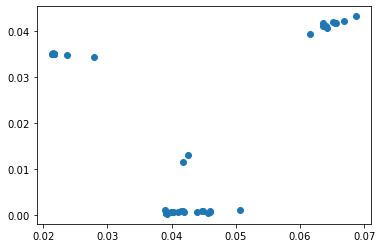

p-value = 0.0004253960771433056
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_113_	상관관계가 있다
p-value = 1.6460985062713445e-08
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_114_	상관관계가 있다
p-value = 4.8484159967419735e-08
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_120_	상관관계가 있다
p-value = 1.866578097550799e-05
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_121_	상관관계가 있다
p-value = 2.0774104646424277e-09
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_126_	상관관계가 있다
p-value = 0.0038899708264640716
[J.출판 영상 방송통신 및 정보서비스업 (58 ~ 63)]_4_	상관관계가 있다
p-value = 0.1816605753419806
[K.금융 및 보험업 (64 ~ 66)]_0_	상관관계가 없다


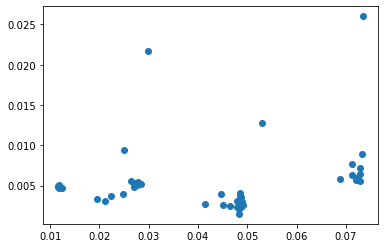

p-value = 2.178130606807324e-06
[K.금융 및 보험업 (64 ~ 66)]_10_	상관관계가 있다
p-value = 0.0002879115147410051
[K.금융 및 보험업 (64 ~ 66)]_12_	상관관계가 있다
p-value = 4.9571568487525e-07
[K.금융 및 보험업 (64 ~ 66)]_15_	상관관계가 있다
p-value = 2.1847160677355816e-06
[K.금융 및 보험업 (64 ~ 66)]_16_	상관관계가 있다
p-value = 8.634145736783087e-08
[K.금융 및 보험업 (64 ~ 66)]_17_	상관관계가 있다
p-value = 5.916316893788937e-07
[K.금융 및 보험업 (64 ~ 66)]_19_	상관관계가 있다
p-value = 9.057990429210197e-06
[K.금융 및 보험업 (64 ~ 66)]_21_	상관관계가 있다
p-value = 0.00010790055124079691
[K.금융 및 보험업 (64 ~ 66)]_22_	상관관계가 있다
p-value = 0.005875279835137906
[K.금융 및 보험업 (64 ~ 66)]_2_	상관관계가 있다
p-value = 7.855383411486747e-05
[K.금융 및 보험업 (64 ~ 66)]_3_	상관관계가 있다
p-value = 9.412475537939802e-07
[K.금융 및 보험업 (64 ~ 66)]_4_	상관관계가 있다
p-value = 1.3517064260195367e-12
[K.금융 및 보험업 (64 ~ 66)]_5_	상관관계가 있다
p-value = 0.015346491360299216
[K.금융 및 보험업 (64 ~ 66)]_6_	상관관계가 있다
p-value = 5.19234957409954e-07
[K.금융 및 보험업 (64 ~ 66)]_7_	상관관계가 있다
p-value = 0.00043160710656487767
[K.금융 및 보험업 (64 ~ 66)]_

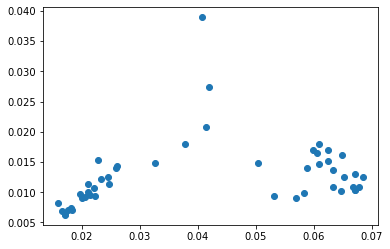

p-value = 9.011740483843351e-06
[L.부동산업 및 임대업 (68 ~ 69)]_100_	상관관계가 있다
p-value = 2.2663890268737354e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1010_	상관관계가 있다
p-value = 3.628229483515299e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1011_	상관관계가 있다
p-value = 3.5213320072979813e-16
[L.부동산업 및 임대업 (68 ~ 69)]_1013_	상관관계가 있다
p-value = 0.0013375499145743097
[L.부동산업 및 임대업 (68 ~ 69)]_1015_	상관관계가 있다
p-value = 3.0538413867562336e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1016_	상관관계가 있다
p-value = 4.579409452229847e-09
[L.부동산업 및 임대업 (68 ~ 69)]_101_	상관관계가 있다
p-value = 4.6445716940136945e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1020_	상관관계가 있다
p-value = 2.366488544552401e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1022_	상관관계가 있다
p-value = 1.0484935928001376e-19
[L.부동산업 및 임대업 (68 ~ 69)]_1023_	상관관계가 있다
p-value = 6.046923711593802e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1024_	상관관계가 있다
p-value = 4.969665619163723e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1027_	상관관계가 있다
p-value = 0.00016001568097606404
[L.부동산업 및 임대업 (68 ~ 69)]_1028_	상관관계가 있다
p-value = 3.8763316286504957e-07
[L.부동산업 및 임대업 (68 ~ 69)]_10

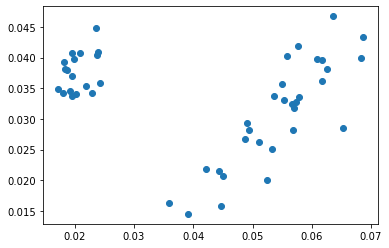

p-value = 0.0010764345777553917
[L.부동산업 및 임대업 (68 ~ 69)]_103_	상관관계가 있다
p-value = 9.08303262699809e-18
[L.부동산업 및 임대업 (68 ~ 69)]_1040_	상관관계가 있다
p-value = 9.078921845186574e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1041_	상관관계가 있다
p-value = 4.11810300044335e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1044_	상관관계가 있다
p-value = 1.072965210244412e-18
[L.부동산업 및 임대업 (68 ~ 69)]_1047_	상관관계가 있다
p-value = 0.12655310841811415
[L.부동산업 및 임대업 (68 ~ 69)]_1048_	상관관계가 없다


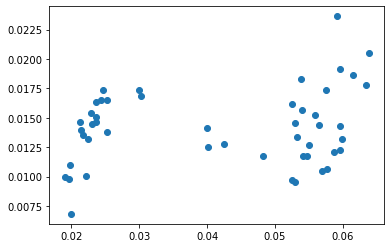

p-value = 5.222108705484506e-11
[L.부동산업 및 임대업 (68 ~ 69)]_1049_	상관관계가 있다
p-value = 8.48059778712819e-12
[L.부동산업 및 임대업 (68 ~ 69)]_104_	상관관계가 있다
p-value = 5.588652681802281e-22
[L.부동산업 및 임대업 (68 ~ 69)]_1050_	상관관계가 있다
p-value = 1.4462542126668787e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1053_	상관관계가 있다
p-value = 2.6744953115705667e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1055_	상관관계가 있다
p-value = 9.999821790247946e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1056_	상관관계가 있다
p-value = 4.758195161694141e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1059_	상관관계가 있다
p-value = 0.05563453707629761
[L.부동산업 및 임대업 (68 ~ 69)]_105_	상관관계가 없다


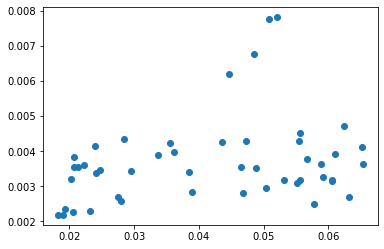

p-value = 1.0103922440586297e-17
[L.부동산업 및 임대업 (68 ~ 69)]_1067_	상관관계가 있다
p-value = 3.201809108503502e-13
[L.부동산업 및 임대업 (68 ~ 69)]_106_	상관관계가 있다
p-value = 9.17143222962639e-21
[L.부동산업 및 임대업 (68 ~ 69)]_1070_	상관관계가 있다
p-value = 3.306055992358998e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1072_	상관관계가 있다
p-value = 2.7562096520059193e-11
[L.부동산업 및 임대업 (68 ~ 69)]_1074_	상관관계가 있다
p-value = 2.563546987897583e-31
[L.부동산업 및 임대업 (68 ~ 69)]_1075_	상관관계가 있다
p-value = 1.8135123860071137e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1076_	상관관계가 있다
p-value = 1.417113366856012e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1077_	상관관계가 있다
p-value = 1.4388205368544655e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1079_	상관관계가 있다
p-value = 0.2157374796727392
[L.부동산업 및 임대업 (68 ~ 69)]_107_	상관관계가 없다


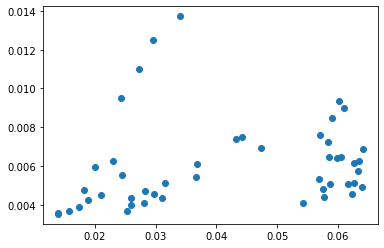

p-value = 8.841974084755067e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1080_	상관관계가 있다
p-value = 0.24933730279918706
[L.부동산업 및 임대업 (68 ~ 69)]_1082_	상관관계가 없다


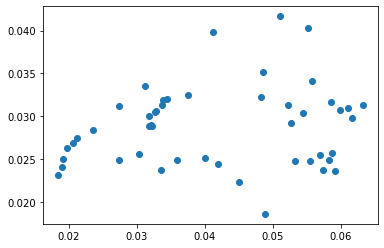

p-value = 0.0003978297505537064
[L.부동산업 및 임대업 (68 ~ 69)]_1083_	상관관계가 있다
p-value = 3.1353113060566742e-24
[L.부동산업 및 임대업 (68 ~ 69)]_1087_	상관관계가 있다
p-value = 0.00010827318095656404
[L.부동산업 및 임대업 (68 ~ 69)]_108_	상관관계가 있다
p-value = 1.026923993408237e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1092_	상관관계가 있다
p-value = 9.441925701463061e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1095_	상관관계가 있다
p-value = 2.19530794168741e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1096_	상관관계가 있다
p-value = 0.0002973897731803162
[L.부동산업 및 임대업 (68 ~ 69)]_109_	상관관계가 있다
p-value = 0.0005640778216041857
[L.부동산업 및 임대업 (68 ~ 69)]_10_	상관관계가 있다
p-value = 0.007862676140861962
[L.부동산업 및 임대업 (68 ~ 69)]_1104_	상관관계가 있다
p-value = 4.4847216138007904e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1109_	상관관계가 있다
p-value = 2.676150033889352e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1110_	상관관계가 있다
p-value = 0.00036062260985712867
[L.부동산업 및 임대업 (68 ~ 69)]_1121_	상관관계가 있다
p-value = 0.0016197008440370197
[L.부동산업 및 임대업 (68 ~ 69)]_1122_	상관관계가 있다
p-value = 1.7504072765412425e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1123_	상관

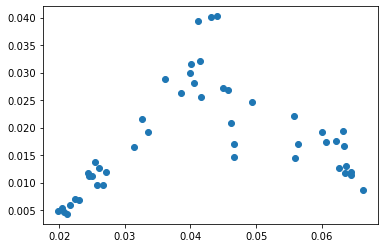

p-value = 2.267511994800739e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1135_	상관관계가 있다
p-value = 8.244179165739321e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1141_	상관관계가 있다
p-value = 0.0028468920015906653
[L.부동산업 및 임대업 (68 ~ 69)]_1148_	상관관계가 있다
p-value = 0.08753329839907523
[L.부동산업 및 임대업 (68 ~ 69)]_1149_	상관관계가 없다


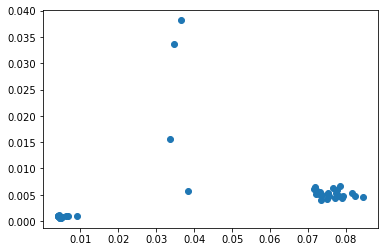

p-value = 0.0010271997859799397
[L.부동산업 및 임대업 (68 ~ 69)]_1150_	상관관계가 있다
p-value = 5.9932075223723555e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1151_	상관관계가 있다
p-value = 0.004634955138685094
[L.부동산업 및 임대업 (68 ~ 69)]_1153_	상관관계가 있다
p-value = 9.940741493910383e-19
[L.부동산업 및 임대업 (68 ~ 69)]_1154_	상관관계가 있다
p-value = 1.674483967475208e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1155_	상관관계가 있다
p-value = 0.01978252574657095
[L.부동산업 및 임대업 (68 ~ 69)]_1156_	상관관계가 있다
p-value = 7.988161392466941e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1158_	상관관계가 있다
p-value = 8.220683560700955e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1159_	상관관계가 있다
p-value = 4.136495792000739e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1160_	상관관계가 있다
p-value = 3.1750810959862495e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1163_	상관관계가 있다
p-value = 0.00010909314451951924
[L.부동산업 및 임대업 (68 ~ 69)]_1168_	상관관계가 있다
p-value = 6.706241243030354e-20
[L.부동산업 및 임대업 (68 ~ 69)]_1169_	상관관계가 있다
p-value = 0.16735555176089353
[L.부동산업 및 임대업 (68 ~ 69)]_116_	상관관계가 없다


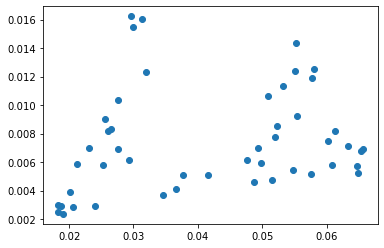

p-value = 5.385877199887658e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1172_	상관관계가 있다
p-value = 0.0006717437032803938
[L.부동산업 및 임대업 (68 ~ 69)]_1173_	상관관계가 있다
p-value = 3.808647692181891e-25
[L.부동산업 및 임대업 (68 ~ 69)]_1174_	상관관계가 있다
p-value = 1.2019061692075022e-11
[L.부동산업 및 임대업 (68 ~ 69)]_1175_	상관관계가 있다
p-value = 1.0507237216669674e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1177_	상관관계가 있다
p-value = 3.515212620790321e-18
[L.부동산업 및 임대업 (68 ~ 69)]_1178_	상관관계가 있다
p-value = 6.80625339808039e-05
[L.부동산업 및 임대업 (68 ~ 69)]_117_	상관관계가 있다
p-value = 5.3549705578514547e-17
[L.부동산업 및 임대업 (68 ~ 69)]_1182_	상관관계가 있다
p-value = 2.3613973298918936e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1184_	상관관계가 있다
p-value = 5.028585280710281e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1185_	상관관계가 있다
p-value = 1.0060564454773407e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1186_	상관관계가 있다
p-value = 0.00019578189265111312
[L.부동산업 및 임대업 (68 ~ 69)]_1187_	상관관계가 있다
p-value = 6.056288353433191e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1190_	상관관계가 있다
p-value = 7.579943660160726e-17
[L.부동산업 및 임대업 (68 ~ 69)]_119

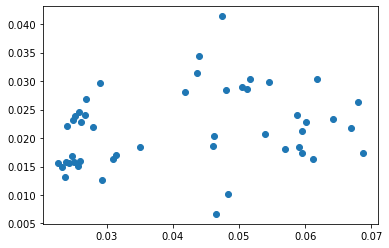

p-value = 0.013961073346871687
[L.부동산업 및 임대업 (68 ~ 69)]_123_	상관관계가 있다
p-value = 1.8504801908957576e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1240_	상관관계가 있다
p-value = 0.0001907366020008267
[L.부동산업 및 임대업 (68 ~ 69)]_1244_	상관관계가 있다
p-value = 7.635883769988013e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1245_	상관관계가 있다
p-value = 6.0613198260756644e-18
[L.부동산업 및 임대업 (68 ~ 69)]_1252_	상관관계가 있다
p-value = 1.115832534340458e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1254_	상관관계가 있다
p-value = 7.035080606706445e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1257_	상관관계가 있다
p-value = 3.163284962656594e-19
[L.부동산업 및 임대업 (68 ~ 69)]_1260_	상관관계가 있다
p-value = 9.016226126203973e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1263_	상관관계가 있다
p-value = 0.001793901497798512
[L.부동산업 및 임대업 (68 ~ 69)]_1264_	상관관계가 있다
p-value = 6.507692859728572e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1265_	상관관계가 있다
p-value = 3.2488283683497335e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1269_	상관관계가 있다
p-value = 2.2364989177944156e-05
[L.부동산업 및 임대업 (68 ~ 69)]_126_	상관관계가 있다
p-value = 0.00034220349080547587
[L.부동산업 및 임대업 (68 ~ 69)]_1270_	

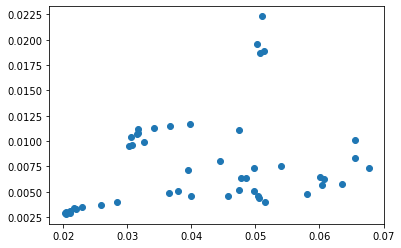

p-value = 5.794654046742276e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1319_	상관관계가 있다
p-value = 0.00010928149918942177
[L.부동산업 및 임대업 (68 ~ 69)]_1320_	상관관계가 있다
p-value = 0.00014982226150779562
[L.부동산업 및 임대업 (68 ~ 69)]_1321_	상관관계가 있다
p-value = 3.2448292504605735e-17
[L.부동산업 및 임대업 (68 ~ 69)]_1333_	상관관계가 있다
p-value = 4.016579123275234e-11
[L.부동산업 및 임대업 (68 ~ 69)]_133_	상관관계가 있다
p-value = 3.3386039634520956e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1355_	상관관계가 있다
p-value = 0.19050553588565602
[L.부동산업 및 임대업 (68 ~ 69)]_135_	상관관계가 없다


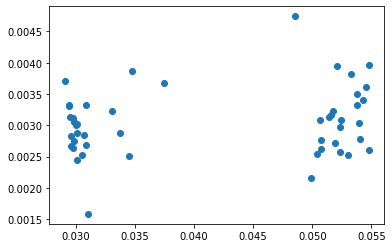

p-value = 1.2304438449445972e-16
[L.부동산업 및 임대업 (68 ~ 69)]_1369_	상관관계가 있다
p-value = 0.6333582523656781
[L.부동산업 및 임대업 (68 ~ 69)]_137_	상관관계가 없다


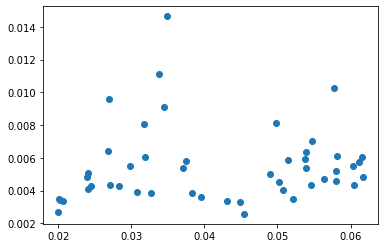

p-value = 0.0004883130838466602
[L.부동산업 및 임대업 (68 ~ 69)]_1395_	상관관계가 있다
p-value = 0.2733363287549914
[L.부동산업 및 임대업 (68 ~ 69)]_139_	상관관계가 없다


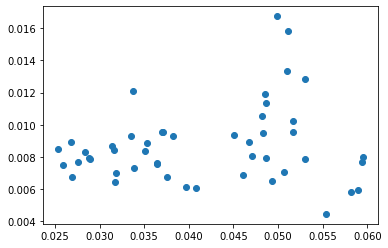

p-value = 6.940166739095972e-15
[L.부동산업 및 임대업 (68 ~ 69)]_13_	상관관계가 있다
p-value = 0.0004619821436009281
[L.부동산업 및 임대업 (68 ~ 69)]_1401_	상관관계가 있다
p-value = 1.068788612378646e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1402_	상관관계가 있다
p-value = 4.886210002348557e-12
[L.부동산업 및 임대업 (68 ~ 69)]_141_	상관관계가 있다
p-value = 2.6457612472605993e-22
[L.부동산업 및 임대업 (68 ~ 69)]_1425_	상관관계가 있다
p-value = 0.009953145710196303
[L.부동산업 및 임대업 (68 ~ 69)]_1426_	상관관계가 있다
p-value = 1.075271099362576e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1427_	상관관계가 있다
p-value = 5.555412874572403e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1432_	상관관계가 있다
p-value = 2.9544333865265403e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1437_	상관관계가 있다
p-value = 0.7458550953375201
[L.부동산업 및 임대업 (68 ~ 69)]_1441_	상관관계가 없다


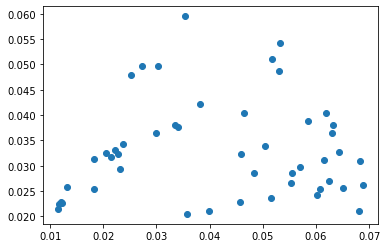

p-value = 1.011358408319861e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1449_	상관관계가 있다
p-value = 0.14508318326821895
[L.부동산업 및 임대업 (68 ~ 69)]_144_	상관관계가 없다


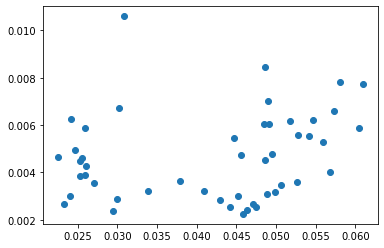

p-value = 2.6351673818255334e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1451_	상관관계가 있다
p-value = 1.359912759902095e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1453_	상관관계가 있다
p-value = 7.521864799615808e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1456_	상관관계가 있다
p-value = 2.8812868901239426e-05
[L.부동산업 및 임대업 (68 ~ 69)]_145_	상관관계가 있다
p-value = 0.00035974201424435285
[L.부동산업 및 임대업 (68 ~ 69)]_1469_	상관관계가 있다
p-value = 0.8781698164627042
[L.부동산업 및 임대업 (68 ~ 69)]_146_	상관관계가 없다


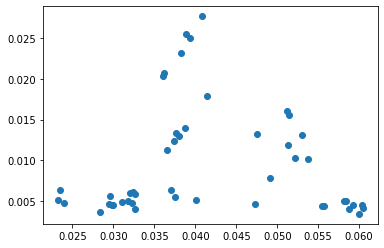

p-value = 0.018200628458608665
[L.부동산업 및 임대업 (68 ~ 69)]_147_	상관관계가 있다
p-value = 0.00045258677943365845
[L.부동산업 및 임대업 (68 ~ 69)]_1482_	상관관계가 있다
p-value = 3.8016582332735354e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1485_	상관관계가 있다
p-value = 1.541834957613638e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1504_	상관관계가 있다
p-value = 0.003793271173683506
[L.부동산업 및 임대업 (68 ~ 69)]_1513_	상관관계가 있다
p-value = 0.0001749668855612498
[L.부동산업 및 임대업 (68 ~ 69)]_152_	상관관계가 있다
p-value = 1.6405340686530678e-06
[L.부동산업 및 임대업 (68 ~ 69)]_153_	상관관계가 있다
p-value = 3.3428468631292283e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1541_	상관관계가 있다
p-value = 8.250877424156927e-07
[L.부동산업 및 임대업 (68 ~ 69)]_154_	상관관계가 있다
p-value = 3.6785667378223207e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1554_	상관관계가 있다
p-value = 8.245128888329465e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1577_	상관관계가 있다
p-value = 4.516692285902056e-18
[L.부동산업 및 임대업 (68 ~ 69)]_1588_	상관관계가 있다
p-value = 0.06433886750413738
[L.부동산업 및 임대업 (68 ~ 69)]_159_	상관관계가 없다


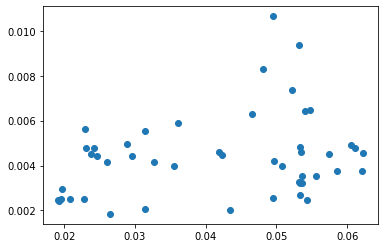

p-value = 0.01003856490792084
[L.부동산업 및 임대업 (68 ~ 69)]_1610_	상관관계가 있다
p-value = 3.742630665897279e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1634_	상관관계가 있다
p-value = 0.021459937218488684
[L.부동산업 및 임대업 (68 ~ 69)]_163_	상관관계가 있다
p-value = 3.1664853703303526e-24
[L.부동산업 및 임대업 (68 ~ 69)]_1644_	상관관계가 있다
p-value = 0.01545930580489106
[L.부동산업 및 임대업 (68 ~ 69)]_1647_	상관관계가 있다
p-value = 0.0018251693394365066
[L.부동산업 및 임대업 (68 ~ 69)]_1652_	상관관계가 있다
p-value = 0.007995266640942864
[L.부동산업 및 임대업 (68 ~ 69)]_1657_	상관관계가 있다
p-value = 5.624170832974363e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1659_	상관관계가 있다
p-value = 0.005799033935823124
[L.부동산업 및 임대업 (68 ~ 69)]_165_	상관관계가 있다
p-value = 2.571688444333867e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1662_	상관관계가 있다
p-value = 2.811880100845284e-11
[L.부동산업 및 임대업 (68 ~ 69)]_1664_	상관관계가 있다
p-value = 1.7987257793807338e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1666_	상관관계가 있다
p-value = 0.006762654128564454
[L.부동산업 및 임대업 (68 ~ 69)]_166_	상관관계가 있다
p-value = 2.1531191024017165e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1671_	상관관계가 있다


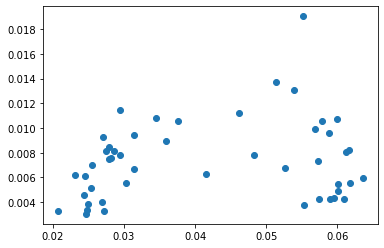

p-value = 9.140496936088518e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1780_	상관관계가 있다
p-value = 7.074703886641549e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1786_	상관관계가 있다
p-value = 1.652991028594449e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1789_	상관관계가 있다
p-value = 2.6248059159898495e-17
[L.부동산업 및 임대업 (68 ~ 69)]_1790_	상관관계가 있다
p-value = 8.112098285769175e-06
[L.부동산업 및 임대업 (68 ~ 69)]_1794_	상관관계가 있다
p-value = 1.3015011200854231e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1795_	상관관계가 있다
p-value = 3.356391923960817e-05
[L.부동산업 및 임대업 (68 ~ 69)]_1796_	상관관계가 있다
p-value = 0.7829612099343751
[L.부동산업 및 임대업 (68 ~ 69)]_1797_	상관관계가 없다


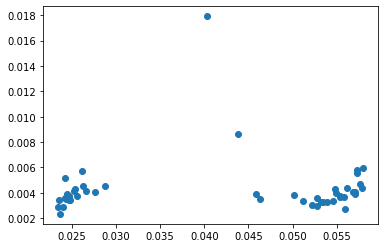

p-value = 2.99832156559308e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1798_	상관관계가 있다
p-value = 1.3195928357538557e-12
[L.부동산업 및 임대업 (68 ~ 69)]_1800_	상관관계가 있다
p-value = 0.07606890160761065
[L.부동산업 및 임대업 (68 ~ 69)]_1801_	상관관계가 없다


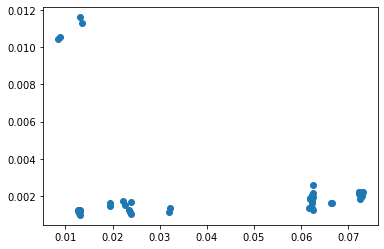

p-value = 1.1745157284669685e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1803_	상관관계가 있다
p-value = 6.809239954990148e-11
[L.부동산업 및 임대업 (68 ~ 69)]_1806_	상관관계가 있다
p-value = 7.295297120095992e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1811_	상관관계가 있다
p-value = 2.4219386642468518e-06
[L.부동산업 및 임대업 (68 ~ 69)]_181_	상관관계가 있다
p-value = 2.4006932325171186e-11
[L.부동산업 및 임대업 (68 ~ 69)]_1823_	상관관계가 있다
p-value = 5.962366287490607e-21
[L.부동산업 및 임대업 (68 ~ 69)]_1824_	상관관계가 있다
p-value = 8.245201044965228e-25
[L.부동산업 및 임대업 (68 ~ 69)]_1831_	상관관계가 있다
p-value = 6.987298147190567e-12
[L.부동산업 및 임대업 (68 ~ 69)]_183_	상관관계가 있다
p-value = 3.0725237430963382e-09
[L.부동산업 및 임대업 (68 ~ 69)]_185_	상관관계가 있다
p-value = 9.679218116661938e-16
[L.부동산업 및 임대업 (68 ~ 69)]_1867_	상관관계가 있다
p-value = 0.00013379028586918702
[L.부동산업 및 임대업 (68 ~ 69)]_186_	상관관계가 있다
p-value = 1.002245447978496e-15
[L.부동산업 및 임대업 (68 ~ 69)]_1874_	상관관계가 있다
p-value = 0.0018260330418825796
[L.부동산업 및 임대업 (68 ~ 69)]_1876_	상관관계가 있다
p-value = 0.10958821866897447
[L.부동산업 및 임대업 (68 ~ 69)]_187_	상관관

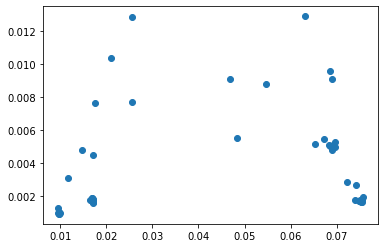

p-value = 4.2521230825470087e-13
[L.부동산업 및 임대업 (68 ~ 69)]_1880_	상관관계가 있다
p-value = 4.43984210879847e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1883_	상관관계가 있다
p-value = 9.79358153961062e-22
[L.부동산업 및 임대업 (68 ~ 69)]_1884_	상관관계가 있다
p-value = 0.05040514801466668
[L.부동산업 및 임대업 (68 ~ 69)]_1886_	상관관계가 없다


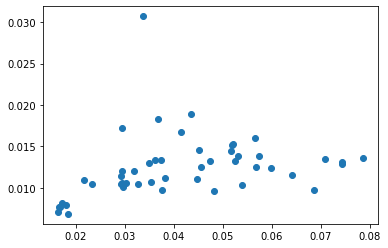

p-value = 0.5159372860121284
[L.부동산업 및 임대업 (68 ~ 69)]_188_	상관관계가 없다


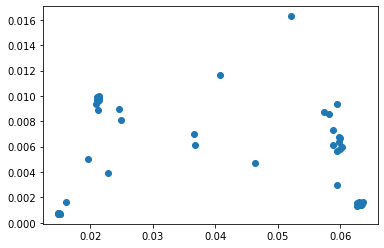

p-value = 6.102786912736095e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1903_	상관관계가 있다
p-value = 5.076299827726504e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1905_	상관관계가 있다
p-value = 5.520992783808359e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1912_	상관관계가 있다
p-value = 0.0007146788952941212
[L.부동산업 및 임대업 (68 ~ 69)]_191_	상관관계가 있다
p-value = 1.0951999304803919e-07
[L.부동산업 및 임대업 (68 ~ 69)]_1921_	상관관계가 있다
p-value = 9.730960073352472e-08
[L.부동산업 및 임대업 (68 ~ 69)]_192_	상관관계가 있다
p-value = 9.880934592673825e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1930_	상관관계가 있다
p-value = 2.1191948778782377e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1933_	상관관계가 있다
p-value = 0.37271716206164285
[L.부동산업 및 임대업 (68 ~ 69)]_1941_	상관관계가 없다


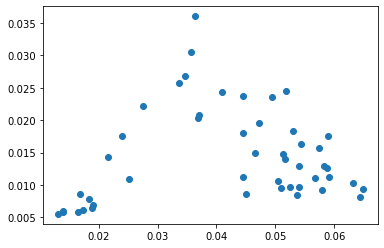

p-value = 0.0006169558448845351
[L.부동산업 및 임대업 (68 ~ 69)]_1944_	상관관계가 있다
p-value = 4.197856473617539e-10
[L.부동산업 및 임대업 (68 ~ 69)]_1945_	상관관계가 있다
p-value = 3.9908803413925305e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1950_	상관관계가 있다
p-value = 0.0027921523547300886
[L.부동산업 및 임대업 (68 ~ 69)]_1953_	상관관계가 있다
p-value = 3.815380263484506e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1955_	상관관계가 있다
p-value = 3.791272465429766e-06
[L.부동산업 및 임대업 (68 ~ 69)]_195_	상관관계가 있다
p-value = 5.0600214504074e-08
[L.부동산업 및 임대업 (68 ~ 69)]_1960_	상관관계가 있다
p-value = 0.002031317839426944
[L.부동산업 및 임대업 (68 ~ 69)]_1962_	상관관계가 있다
p-value = 1.482224742661586e-21
[L.부동산업 및 임대업 (68 ~ 69)]_1966_	상관관계가 있다
p-value = 6.228767754985473e-14
[L.부동산업 및 임대업 (68 ~ 69)]_1967_	상관관계가 있다
p-value = 2.4126977948596493e-09
[L.부동산업 및 임대업 (68 ~ 69)]_1968_	상관관계가 있다
p-value = 0.0007403656465639008
[L.부동산업 및 임대업 (68 ~ 69)]_1969_	상관관계가 있다
p-value = 9.793472378246623e-05
[L.부동산업 및 임대업 (68 ~ 69)]_196_	상관관계가 있다
p-value = 1.1629294582494343e-29
[L.부동산업 및 임대업 (68 ~ 69)]_1977_	상관관

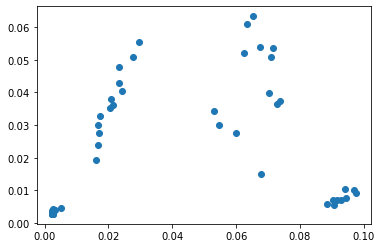

p-value = 0.2808375183995239
[L.부동산업 및 임대업 (68 ~ 69)]_2071_	상관관계가 없다


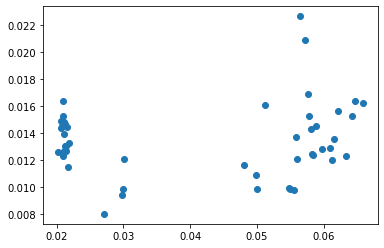

p-value = 4.2181701326992755e-08
[L.부동산업 및 임대업 (68 ~ 69)]_2073_	상관관계가 있다
p-value = 0.00015184146774784173
[L.부동산업 및 임대업 (68 ~ 69)]_2077_	상관관계가 있다
p-value = 3.239496455081678e-12
[L.부동산업 및 임대업 (68 ~ 69)]_208_	상관관계가 있다
p-value = 0.0005207384713616025
[L.부동산업 및 임대업 (68 ~ 69)]_209_	상관관계가 있다
p-value = 4.839490192684505e-13
[L.부동산업 및 임대업 (68 ~ 69)]_2100_	상관관계가 있다
p-value = 1.6784674399050524e-07
[L.부동산업 및 임대업 (68 ~ 69)]_2111_	상관관계가 있다
p-value = 1.705712618612977e-05
[L.부동산업 및 임대업 (68 ~ 69)]_211_	상관관계가 있다
p-value = 8.982803383404116e-08
[L.부동산업 및 임대업 (68 ~ 69)]_2121_	상관관계가 있다
p-value = 1.6403891403577905e-06
[L.부동산업 및 임대업 (68 ~ 69)]_212_	상관관계가 있다
p-value = 7.5963923177159175e-28
[L.부동산업 및 임대업 (68 ~ 69)]_2132_	상관관계가 있다
p-value = 1.752988645787137e-08
[L.부동산업 및 임대업 (68 ~ 69)]_213_	상관관계가 있다
p-value = 1.0847737199679396e-12
[L.부동산업 및 임대업 (68 ~ 69)]_2144_	상관관계가 있다
p-value = 5.1231725031743706e-05
[L.부동산업 및 임대업 (68 ~ 69)]_2151_	상관관계가 있다
p-value = 1.2326634565515254e-11
[L.부동산업 및 임대업 (68 ~ 69)]_2152

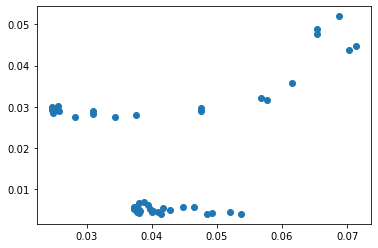

p-value = 0.0003011982694994128
[L.부동산업 및 임대업 (68 ~ 69)]_221_	상관관계가 있다
p-value = 1.003656263820818e-14
[L.부동산업 및 임대업 (68 ~ 69)]_2222_	상관관계가 있다
p-value = 1.8492591337140158e-14
[L.부동산업 및 임대업 (68 ~ 69)]_222_	상관관계가 있다
p-value = 2.7900086917047604e-18
[L.부동산업 및 임대업 (68 ~ 69)]_2230_	상관관계가 있다
p-value = 1.872429060473944e-06
[L.부동산업 및 임대업 (68 ~ 69)]_223_	상관관계가 있다
p-value = 2.1686654999861818e-16
[L.부동산업 및 임대업 (68 ~ 69)]_2244_	상관관계가 있다
p-value = 6.646564998819347e-11
[L.부동산업 및 임대업 (68 ~ 69)]_224_	상관관계가 있다
p-value = 6.176418817108601e-10
[L.부동산업 및 임대업 (68 ~ 69)]_226_	상관관계가 있다
p-value = 1.476919738892695e-09
[L.부동산업 및 임대업 (68 ~ 69)]_228_	상관관계가 있다
p-value = 4.1622508523397226e-14
[L.부동산업 및 임대업 (68 ~ 69)]_230_	상관관계가 있다
p-value = 0.014238248188613765
[L.부동산업 및 임대업 (68 ~ 69)]_231_	상관관계가 있다
p-value = 1.0785376142390929e-05
[L.부동산업 및 임대업 (68 ~ 69)]_2321_	상관관계가 있다
p-value = 2.00846799743227e-15
[L.부동산업 및 임대업 (68 ~ 69)]_2334_	상관관계가 있다
p-value = 1.9765331461570532e-14
[L.부동산업 및 임대업 (68 ~ 69)]_233_	상관관계가 

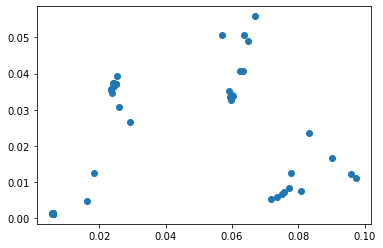

p-value = 2.6639687898231603e-05
[L.부동산업 및 임대업 (68 ~ 69)]_258_	상관관계가 있다
p-value = 0.00027514377023973705
[L.부동산업 및 임대업 (68 ~ 69)]_259_	상관관계가 있다
p-value = 1.511408686384996e-13
[L.부동산업 및 임대업 (68 ~ 69)]_25_	상관관계가 있다
p-value = 1.2166114647295587e-05
[L.부동산업 및 임대업 (68 ~ 69)]_260_	상관관계가 있다
p-value = 3.636782096704696e-09
[L.부동산업 및 임대업 (68 ~ 69)]_261_	상관관계가 있다
p-value = 6.417216206060185e-06
[L.부동산업 및 임대업 (68 ~ 69)]_262_	상관관계가 있다
p-value = 3.127011332921067e-11
[L.부동산업 및 임대업 (68 ~ 69)]_264_	상관관계가 있다
p-value = 6.276368487698533e-06
[L.부동산업 및 임대업 (68 ~ 69)]_266_	상관관계가 있다
p-value = 1.9004265927743947e-12
[L.부동산업 및 임대업 (68 ~ 69)]_267_	상관관계가 있다
p-value = 1.2155929158168256e-05
[L.부동산업 및 임대업 (68 ~ 69)]_268_	상관관계가 있다
p-value = 2.8639736890989357e-09
[L.부동산업 및 임대업 (68 ~ 69)]_26_	상관관계가 있다
p-value = 3.862683397890057e-11
[L.부동산업 및 임대업 (68 ~ 69)]_270_	상관관계가 있다
p-value = 1.4306949351547336e-09
[L.부동산업 및 임대업 (68 ~ 69)]_271_	상관관계가 있다
p-value = 1.306324369667249e-09
[L.부동산업 및 임대업 (68 ~ 69)]_272_	상관관계가 있다
p

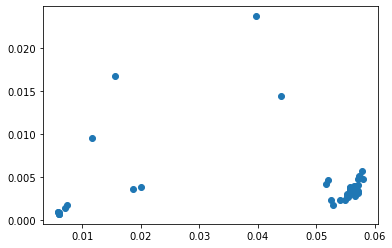

p-value = 1.444931842320911e-09
[L.부동산업 및 임대업 (68 ~ 69)]_282_	상관관계가 있다
p-value = 0.13203558094393064
[L.부동산업 및 임대업 (68 ~ 69)]_283_	상관관계가 없다


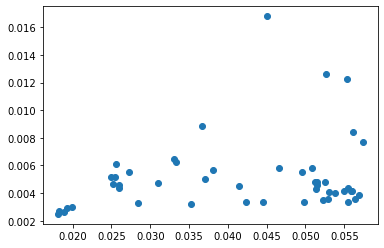

p-value = 1.050748320760354e-10
[L.부동산업 및 임대업 (68 ~ 69)]_284_	상관관계가 있다
p-value = 0.0001412710910583513
[L.부동산업 및 임대업 (68 ~ 69)]_285_	상관관계가 있다
p-value = 0.00030296447007309614
[L.부동산업 및 임대업 (68 ~ 69)]_286_	상관관계가 있다
p-value = 0.00016730389342937212
[L.부동산업 및 임대업 (68 ~ 69)]_287_	상관관계가 있다
p-value = 7.548684408940805e-18
[L.부동산업 및 임대업 (68 ~ 69)]_288_	상관관계가 있다
p-value = 5.5847402259755735e-12
[L.부동산업 및 임대업 (68 ~ 69)]_292_	상관관계가 있다
p-value = 1.8616472466514536e-06
[L.부동산업 및 임대업 (68 ~ 69)]_293_	상관관계가 있다
p-value = 0.003500912982937203
[L.부동산업 및 임대업 (68 ~ 69)]_295_	상관관계가 있다
p-value = 0.0020241994099272445
[L.부동산업 및 임대업 (68 ~ 69)]_296_	상관관계가 있다
p-value = 2.0054491683340996e-12
[L.부동산업 및 임대업 (68 ~ 69)]_298_	상관관계가 있다
p-value = 9.859782371650978e-15
[L.부동산업 및 임대업 (68 ~ 69)]_29_	상관관계가 있다
p-value = 9.078783044388796e-06
[L.부동산업 및 임대업 (68 ~ 69)]_2_	상관관계가 있다
p-value = 1.1041300107782676e-06
[L.부동산업 및 임대업 (68 ~ 69)]_300_	상관관계가 있다
p-value = 2.1860651209541333e-06
[L.부동산업 및 임대업 (68 ~ 69)]_302_	상관관계가 있다
p-v

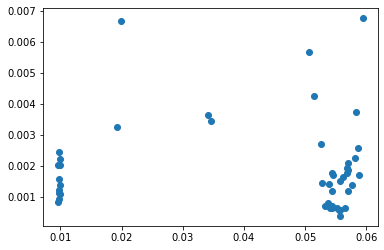

p-value = 3.936147938465484e-09
[L.부동산업 및 임대업 (68 ~ 69)]_304_	상관관계가 있다
p-value = 8.465741661752622e-08
[L.부동산업 및 임대업 (68 ~ 69)]_305_	상관관계가 있다
p-value = 0.0017813565099148642
[L.부동산업 및 임대업 (68 ~ 69)]_306_	상관관계가 있다
p-value = 2.7546899866127526e-05
[L.부동산업 및 임대업 (68 ~ 69)]_307_	상관관계가 있다
p-value = 0.007058167808526832
[L.부동산업 및 임대업 (68 ~ 69)]_309_	상관관계가 있다
p-value = 1.1575609461844225e-10
[L.부동산업 및 임대업 (68 ~ 69)]_30_	상관관계가 있다
p-value = 9.034452552792843e-09
[L.부동산업 및 임대업 (68 ~ 69)]_310_	상관관계가 있다
p-value = 8.858018731028703e-05
[L.부동산업 및 임대업 (68 ~ 69)]_311_	상관관계가 있다
p-value = 3.1263053903778755e-22
[L.부동산업 및 임대업 (68 ~ 69)]_312_	상관관계가 있다
p-value = 6.155359749680075e-11
[L.부동산업 및 임대업 (68 ~ 69)]_314_	상관관계가 있다
p-value = 1.513302434865539e-08
[L.부동산업 및 임대업 (68 ~ 69)]_316_	상관관계가 있다
p-value = 0.00016078541373715374
[L.부동산업 및 임대업 (68 ~ 69)]_319_	상관관계가 있다
p-value = 8.742453150994032e-16
[L.부동산업 및 임대업 (68 ~ 69)]_320_	상관관계가 있다
p-value = 2.1753177783626526e-08
[L.부동산업 및 임대업 (68 ~ 69)]_321_	상관관계가 있다
p-v

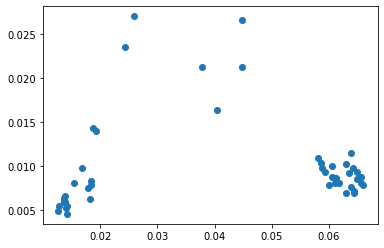

p-value = 0.11440588934704955
[L.부동산업 및 임대업 (68 ~ 69)]_335_	상관관계가 없다


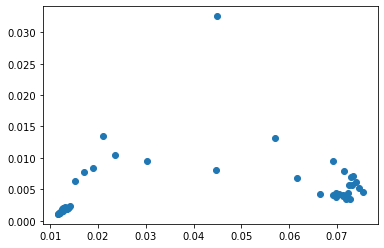

p-value = 0.00017574320644566613
[L.부동산업 및 임대업 (68 ~ 69)]_336_	상관관계가 있다
p-value = 0.1907841768037262
[L.부동산업 및 임대업 (68 ~ 69)]_337_	상관관계가 없다


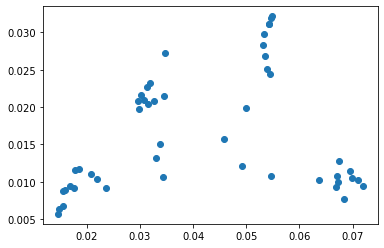

p-value = 1.742969520510182e-11
[L.부동산업 및 임대업 (68 ~ 69)]_339_	상관관계가 있다
p-value = 4.616626875105118e-12
[L.부동산업 및 임대업 (68 ~ 69)]_33_	상관관계가 있다
p-value = 0.019346023898081054
[L.부동산업 및 임대업 (68 ~ 69)]_341_	상관관계가 있다
p-value = 1.0015588201083055e-08
[L.부동산업 및 임대업 (68 ~ 69)]_342_	상관관계가 있다
p-value = 0.021804485200691413
[L.부동산업 및 임대업 (68 ~ 69)]_343_	상관관계가 있다
p-value = 2.8222001574112965e-11
[L.부동산업 및 임대업 (68 ~ 69)]_345_	상관관계가 있다
p-value = 2.0013444210072625e-07
[L.부동산업 및 임대업 (68 ~ 69)]_346_	상관관계가 있다
p-value = 1.3399013383797465e-07
[L.부동산업 및 임대업 (68 ~ 69)]_347_	상관관계가 있다
p-value = 0.015611936656837957
[L.부동산업 및 임대업 (68 ~ 69)]_348_	상관관계가 있다
p-value = 0.0365220482187387
[L.부동산업 및 임대업 (68 ~ 69)]_349_	상관관계가 있다
p-value = 1.7655937756441933e-10
[L.부동산업 및 임대업 (68 ~ 69)]_353_	상관관계가 있다
p-value = 0.0019482454380813413
[L.부동산업 및 임대업 (68 ~ 69)]_357_	상관관계가 있다
p-value = 0.021833193627295105
[L.부동산업 및 임대업 (68 ~ 69)]_358_	상관관계가 있다
p-value = 2.0510318945608696e-23
[L.부동산업 및 임대업 (68 ~ 69)]_359_	상관관계가 있다
p-value 

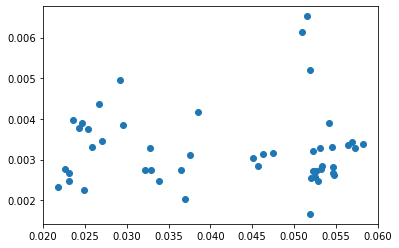

p-value = 0.10006154303141179
[L.부동산업 및 임대업 (68 ~ 69)]_426_	상관관계가 없다


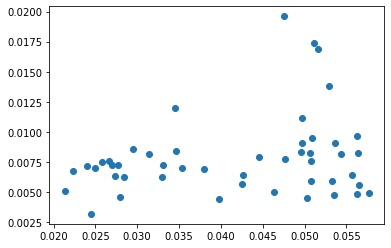

p-value = 0.5631380061570473
[L.부동산업 및 임대업 (68 ~ 69)]_427_	상관관계가 없다


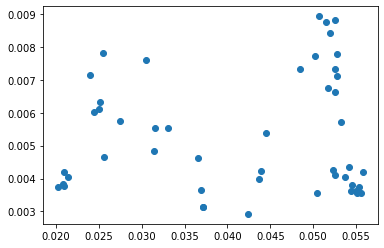

p-value = 0.0006039635388124029
[L.부동산업 및 임대업 (68 ~ 69)]_430_	상관관계가 있다
p-value = 3.0494200571545694e-15
[L.부동산업 및 임대업 (68 ~ 69)]_431_	상관관계가 있다
p-value = 8.413393716356734e-16
[L.부동산업 및 임대업 (68 ~ 69)]_433_	상관관계가 있다
p-value = 8.890148383399432e-08
[L.부동산업 및 임대업 (68 ~ 69)]_436_	상관관계가 있다
p-value = 0.0027123481637105805
[L.부동산업 및 임대업 (68 ~ 69)]_43_	상관관계가 있다
p-value = 1.5768325737259737e-14
[L.부동산업 및 임대업 (68 ~ 69)]_442_	상관관계가 있다
p-value = 1.2609967988212754e-10
[L.부동산업 및 임대업 (68 ~ 69)]_444_	상관관계가 있다
p-value = 6.018306235371948e-07
[L.부동산업 및 임대업 (68 ~ 69)]_445_	상관관계가 있다
p-value = 2.875319160427291e-10
[L.부동산업 및 임대업 (68 ~ 69)]_446_	상관관계가 있다
p-value = 2.942687427935965e-11
[L.부동산업 및 임대업 (68 ~ 69)]_447_	상관관계가 있다
p-value = 0.002630964651959876
[L.부동산업 및 임대업 (68 ~ 69)]_448_	상관관계가 있다
p-value = 4.180806594249714e-09
[L.부동산업 및 임대업 (68 ~ 69)]_44_	상관관계가 있다
p-value = 1.829504612242894e-07
[L.부동산업 및 임대업 (68 ~ 69)]_452_	상관관계가 있다
p-value = 1.6751832379922248e-05
[L.부동산업 및 임대업 (68 ~ 69)]_457_	상관관계가 있다
p-val

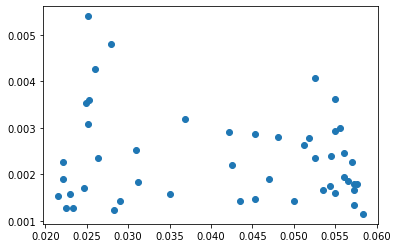

p-value = 8.85139245658482e-05
[L.부동산업 및 임대업 (68 ~ 69)]_464_	상관관계가 있다
p-value = 6.735148486467522e-15
[L.부동산업 및 임대업 (68 ~ 69)]_465_	상관관계가 있다
p-value = 3.099047688761521e-11
[L.부동산업 및 임대업 (68 ~ 69)]_466_	상관관계가 있다
p-value = 0.0002052747871746082
[L.부동산업 및 임대업 (68 ~ 69)]_467_	상관관계가 있다
p-value = 0.0002028454041911029
[L.부동산업 및 임대업 (68 ~ 69)]_46_	상관관계가 있다
p-value = 0.024165112138536424
[L.부동산업 및 임대업 (68 ~ 69)]_472_	상관관계가 있다
p-value = 1.813133478936642e-09
[L.부동산업 및 임대업 (68 ~ 69)]_477_	상관관계가 있다
p-value = 6.186072569474538e-08
[L.부동산업 및 임대업 (68 ~ 69)]_479_	상관관계가 있다
p-value = 3.206834729300418e-11
[L.부동산업 및 임대업 (68 ~ 69)]_481_	상관관계가 있다
p-value = 9.546929159760772e-11
[L.부동산업 및 임대업 (68 ~ 69)]_482_	상관관계가 있다
p-value = 3.188821519456685e-19
[L.부동산업 및 임대업 (68 ~ 69)]_484_	상관관계가 있다
p-value = 0.0002796091327136855
[L.부동산업 및 임대업 (68 ~ 69)]_486_	상관관계가 있다
p-value = 1.5426413555060514e-06
[L.부동산업 및 임대업 (68 ~ 69)]_487_	상관관계가 있다
p-value = 0.013536756871382092
[L.부동산업 및 임대업 (68 ~ 69)]_489_	상관관계가 있다
p-value =

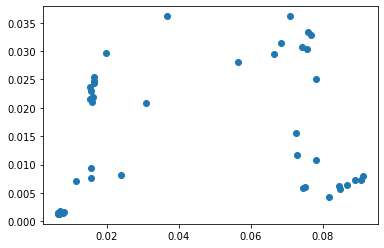

p-value = 1.1757267526491898e-16
[L.부동산업 및 임대업 (68 ~ 69)]_606_	상관관계가 있다
p-value = 2.111419946293877e-08
[L.부동산업 및 임대업 (68 ~ 69)]_607_	상관관계가 있다
p-value = 3.34746610744818e-11
[L.부동산업 및 임대업 (68 ~ 69)]_608_	상관관계가 있다
p-value = 1.647693620435467e-17
[L.부동산업 및 임대업 (68 ~ 69)]_60_	상관관계가 있다
p-value = 1.7169464702346728e-14
[L.부동산업 및 임대업 (68 ~ 69)]_610_	상관관계가 있다
p-value = 1.3109150087416008e-07
[L.부동산업 및 임대업 (68 ~ 69)]_611_	상관관계가 있다
p-value = 5.4782384555629636e-08
[L.부동산업 및 임대업 (68 ~ 69)]_613_	상관관계가 있다
p-value = 8.101217177649038e-07
[L.부동산업 및 임대업 (68 ~ 69)]_615_	상관관계가 있다
p-value = 2.991041951062329e-24
[L.부동산업 및 임대업 (68 ~ 69)]_616_	상관관계가 있다
p-value = 0.003058396184825632
[L.부동산업 및 임대업 (68 ~ 69)]_617_	상관관계가 있다
p-value = 6.372256432879622e-15
[L.부동산업 및 임대업 (68 ~ 69)]_618_	상관관계가 있다
p-value = 6.450923712175386e-11
[L.부동산업 및 임대업 (68 ~ 69)]_619_	상관관계가 있다
p-value = 0.00022644348641493554
[L.부동산업 및 임대업 (68 ~ 69)]_620_	상관관계가 있다
p-value = 1.5925477784397316e-10
[L.부동산업 및 임대업 (68 ~ 69)]_621_	상관관계가 있다
p-v

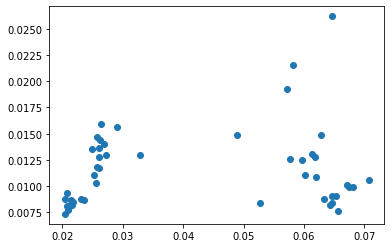

p-value = 2.713337704345098e-09
[L.부동산업 및 임대업 (68 ~ 69)]_640_	상관관계가 있다
p-value = 0.8039208553529887
[L.부동산업 및 임대업 (68 ~ 69)]_643_	상관관계가 없다


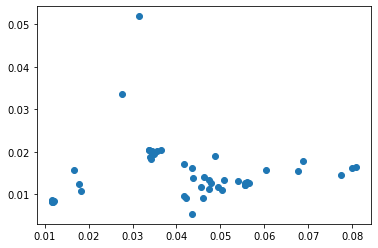

p-value = 2.76503065747006e-05
[L.부동산업 및 임대업 (68 ~ 69)]_644_	상관관계가 있다
p-value = 2.890926997869917e-14
[L.부동산업 및 임대업 (68 ~ 69)]_650_	상관관계가 있다
p-value = 2.4825623061147493e-06
[L.부동산업 및 임대업 (68 ~ 69)]_651_	상관관계가 있다
p-value = 8.001757558790799e-05
[L.부동산업 및 임대업 (68 ~ 69)]_652_	상관관계가 있다
p-value = 8.142928369468277e-20
[L.부동산업 및 임대업 (68 ~ 69)]_654_	상관관계가 있다
p-value = 4.3815910652060766e-15
[L.부동산업 및 임대업 (68 ~ 69)]_659_	상관관계가 있다
p-value = 9.842223325463921e-06
[L.부동산업 및 임대업 (68 ~ 69)]_663_	상관관계가 있다
p-value = 3.1322161763896892e-12
[L.부동산업 및 임대업 (68 ~ 69)]_667_	상관관계가 있다
p-value = 1.065055708934446e-12
[L.부동산업 및 임대업 (68 ~ 69)]_669_	상관관계가 있다
p-value = 4.8815286672989816e-05
[L.부동산업 및 임대업 (68 ~ 69)]_675_	상관관계가 있다
p-value = 1.1487868609573756e-07
[L.부동산업 및 임대업 (68 ~ 69)]_676_	상관관계가 있다
p-value = 9.65443332220184e-11
[L.부동산업 및 임대업 (68 ~ 69)]_691_	상관관계가 있다
p-value = 1.8174363065537874e-07
[L.부동산업 및 임대업 (68 ~ 69)]_692_	상관관계가 있다
p-value = 1.9003618081537067e-14
[L.부동산업 및 임대업 (68 ~ 69)]_693_	상관관계가 있다
p

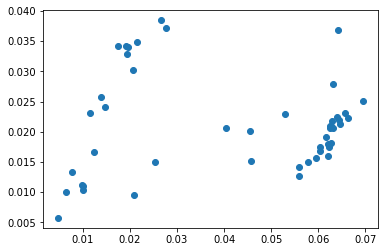

p-value = 4.999332481178955e-06
[L.부동산업 및 임대업 (68 ~ 69)]_750_	상관관계가 있다
p-value = 4.396682862718282e-15
[L.부동산업 및 임대업 (68 ~ 69)]_757_	상관관계가 있다
p-value = 2.3559866430174246e-05
[L.부동산업 및 임대업 (68 ~ 69)]_761_	상관관계가 있다
p-value = 5.311233974622805e-09
[L.부동산업 및 임대업 (68 ~ 69)]_762_	상관관계가 있다
p-value = 5.729433756613268e-11
[L.부동산업 및 임대업 (68 ~ 69)]_768_	상관관계가 있다
p-value = 6.30961504824076e-11
[L.부동산업 및 임대업 (68 ~ 69)]_769_	상관관계가 있다
p-value = 8.062417683897086e-10
[L.부동산업 및 임대업 (68 ~ 69)]_76_	상관관계가 있다
p-value = 0.00010484939390240418
[L.부동산업 및 임대업 (68 ~ 69)]_771_	상관관계가 있다
p-value = 3.471464073438771e-22
[L.부동산업 및 임대업 (68 ~ 69)]_772_	상관관계가 있다
p-value = 7.877957438274297e-07
[L.부동산업 및 임대업 (68 ~ 69)]_773_	상관관계가 있다
p-value = 4.473809305189508e-06
[L.부동산업 및 임대업 (68 ~ 69)]_780_	상관관계가 있다
p-value = 5.18090933510225e-12
[L.부동산업 및 임대업 (68 ~ 69)]_781_	상관관계가 있다
p-value = 0.003805609653369481
[L.부동산업 및 임대업 (68 ~ 69)]_782_	상관관계가 있다
p-value = 9.961903663652742e-19
[L.부동산업 및 임대업 (68 ~ 69)]_783_	상관관계가 있다
p-value 

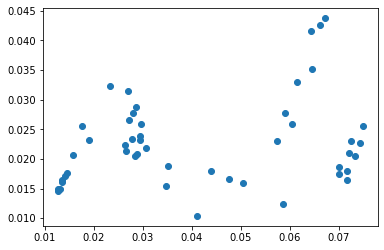

p-value = 1.0758911924213872e-12
[L.부동산업 및 임대업 (68 ~ 69)]_819_	상관관계가 있다
p-value = 7.618691788261421e-06
[L.부동산업 및 임대업 (68 ~ 69)]_827_	상관관계가 있다
p-value = 2.6527391590166454e-15
[L.부동산업 및 임대업 (68 ~ 69)]_830_	상관관계가 있다
p-value = 4.199099224331666e-18
[L.부동산업 및 임대업 (68 ~ 69)]_831_	상관관계가 있다
p-value = 8.188917724152516e-10
[L.부동산업 및 임대업 (68 ~ 69)]_835_	상관관계가 있다
p-value = 6.065676560968892e-06
[L.부동산업 및 임대업 (68 ~ 69)]_836_	상관관계가 있다
p-value = 1.1928112607400535e-05
[L.부동산업 및 임대업 (68 ~ 69)]_837_	상관관계가 있다
p-value = 6.821592485210366e-06
[L.부동산업 및 임대업 (68 ~ 69)]_838_	상관관계가 있다
p-value = 0.00862979660856118
[L.부동산업 및 임대업 (68 ~ 69)]_839_	상관관계가 있다
p-value = 0.17508016357064898
[L.부동산업 및 임대업 (68 ~ 69)]_83_	상관관계가 없다


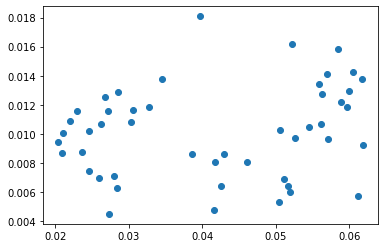

p-value = 3.004941752858908e-14
[L.부동산업 및 임대업 (68 ~ 69)]_840_	상관관계가 있다
p-value = 4.014719099199542e-09
[L.부동산업 및 임대업 (68 ~ 69)]_841_	상관관계가 있다
p-value = 1.1612238600872513e-10
[L.부동산업 및 임대업 (68 ~ 69)]_842_	상관관계가 있다
p-value = 1.2426708687818387e-06
[L.부동산업 및 임대업 (68 ~ 69)]_844_	상관관계가 있다
p-value = 3.056614981157369e-10
[L.부동산업 및 임대업 (68 ~ 69)]_845_	상관관계가 있다
p-value = 4.4629242840547944e-08
[L.부동산업 및 임대업 (68 ~ 69)]_846_	상관관계가 있다
p-value = 1.1250167843124222e-07
[L.부동산업 및 임대업 (68 ~ 69)]_847_	상관관계가 있다
p-value = 0.8628962655899513
[L.부동산업 및 임대업 (68 ~ 69)]_848_	상관관계가 없다


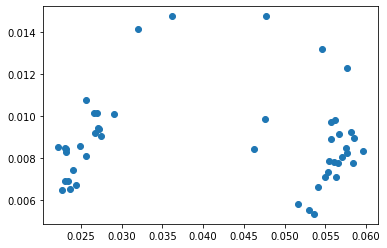

p-value = 6.752720731089905e-08
[L.부동산업 및 임대업 (68 ~ 69)]_849_	상관관계가 있다
p-value = 0.001855600199882599
[L.부동산업 및 임대업 (68 ~ 69)]_850_	상관관계가 있다
p-value = 0.26044199063642215
[L.부동산업 및 임대업 (68 ~ 69)]_853_	상관관계가 없다


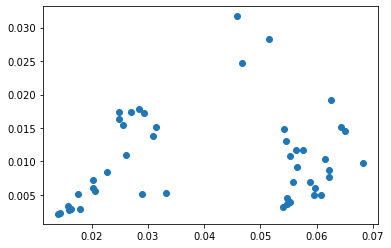

p-value = 1.54744982870617e-08
[L.부동산업 및 임대업 (68 ~ 69)]_855_	상관관계가 있다
p-value = 2.7770556719807695e-05
[L.부동산업 및 임대업 (68 ~ 69)]_856_	상관관계가 있다
p-value = 5.087555361841381e-11
[L.부동산업 및 임대업 (68 ~ 69)]_858_	상관관계가 있다
p-value = 0.009282417134397902
[L.부동산업 및 임대업 (68 ~ 69)]_859_	상관관계가 있다
p-value = 7.580215456163378e-14
[L.부동산업 및 임대업 (68 ~ 69)]_85_	상관관계가 있다
p-value = 1.4283394508528028e-09
[L.부동산업 및 임대업 (68 ~ 69)]_862_	상관관계가 있다
p-value = 3.373391012719935e-08
[L.부동산업 및 임대업 (68 ~ 69)]_864_	상관관계가 있다
p-value = 8.545925673516082e-11
[L.부동산업 및 임대업 (68 ~ 69)]_868_	상관관계가 있다
p-value = 1.0343147109449668e-05
[L.부동산업 및 임대업 (68 ~ 69)]_86_	상관관계가 있다
p-value = 0.00027747819177081977
[L.부동산업 및 임대업 (68 ~ 69)]_871_	상관관계가 있다
p-value = 2.947374587081574e-11
[L.부동산업 및 임대업 (68 ~ 69)]_872_	상관관계가 있다
p-value = 4.153234658404871e-05
[L.부동산업 및 임대업 (68 ~ 69)]_875_	상관관계가 있다
p-value = 3.533891785961885e-14
[L.부동산업 및 임대업 (68 ~ 69)]_876_	상관관계가 있다
p-value = 2.3483018874742775e-19
[L.부동산업 및 임대업 (68 ~ 69)]_878_	상관관계가 있다
p-val

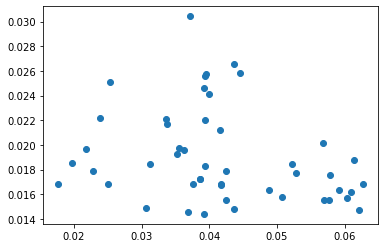

p-value = 3.586593561257238e-05
[L.부동산업 및 임대업 (68 ~ 69)]_90_	상관관계가 있다
p-value = 0.00014353012179419553
[L.부동산업 및 임대업 (68 ~ 69)]_910_	상관관계가 있다
p-value = 8.009818315031691e-05
[L.부동산업 및 임대업 (68 ~ 69)]_911_	상관관계가 있다
p-value = 1.7202368637164305e-06
[L.부동산업 및 임대업 (68 ~ 69)]_912_	상관관계가 있다
p-value = 0.00010921061619177617
[L.부동산업 및 임대업 (68 ~ 69)]_913_	상관관계가 있다
p-value = 1.2275313146595914e-20
[L.부동산업 및 임대업 (68 ~ 69)]_914_	상관관계가 있다
p-value = 2.1809834601473937e-05
[L.부동산업 및 임대업 (68 ~ 69)]_917_	상관관계가 있다
p-value = 9.076331969774281e-07
[L.부동산업 및 임대업 (68 ~ 69)]_918_	상관관계가 있다
p-value = 0.00017881182139896308
[L.부동산업 및 임대업 (68 ~ 69)]_919_	상관관계가 있다
p-value = 0.3032865767413982
[L.부동산업 및 임대업 (68 ~ 69)]_91_	상관관계가 없다


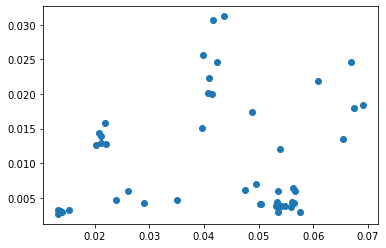

p-value = 8.973727999117208e-08
[L.부동산업 및 임대업 (68 ~ 69)]_922_	상관관계가 있다
p-value = 5.73347991265865e-13
[L.부동산업 및 임대업 (68 ~ 69)]_925_	상관관계가 있다
p-value = 2.4831461588940857e-14
[L.부동산업 및 임대업 (68 ~ 69)]_930_	상관관계가 있다
p-value = 0.00031469023495313286
[L.부동산업 및 임대업 (68 ~ 69)]_931_	상관관계가 있다
p-value = 1.169618389921544e-14
[L.부동산업 및 임대업 (68 ~ 69)]_932_	상관관계가 있다
p-value = 0.00015109808651596413
[L.부동산업 및 임대업 (68 ~ 69)]_936_	상관관계가 있다
p-value = 6.287091004299716e-13
[L.부동산업 및 임대업 (68 ~ 69)]_939_	상관관계가 있다
p-value = 1.5933467009327356e-07
[L.부동산업 및 임대업 (68 ~ 69)]_943_	상관관계가 있다
p-value = 1.0929931523412444e-07
[L.부동산업 및 임대업 (68 ~ 69)]_950_	상관관계가 있다
p-value = 5.273686472354319e-14
[L.부동산업 및 임대업 (68 ~ 69)]_951_	상관관계가 있다
p-value = 1.2589688669981162e-06
[L.부동산업 및 임대업 (68 ~ 69)]_954_	상관관계가 있다
p-value = 1.6473855124557697e-19
[L.부동산업 및 임대업 (68 ~ 69)]_958_	상관관계가 있다
p-value = 1.4586522102449834e-12
[L.부동산업 및 임대업 (68 ~ 69)]_959_	상관관계가 있다
p-value = 0.0005603806126408511
[L.부동산업 및 임대업 (68 ~ 69)]_95_	상관관계가 있다


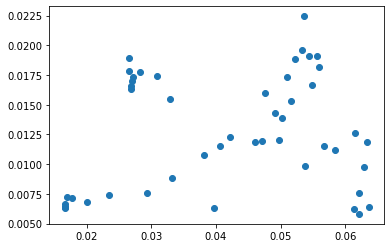

p-value = 6.276053687087523e-13
[L.부동산업 및 임대업 (68 ~ 69)]_970_	상관관계가 있다
p-value = 6.518242962335972e-08
[L.부동산업 및 임대업 (68 ~ 69)]_975_	상관관계가 있다
p-value = 3.082678938501333e-06
[L.부동산업 및 임대업 (68 ~ 69)]_97_	상관관계가 있다
p-value = 0.00023359934066802956
[L.부동산업 및 임대업 (68 ~ 69)]_980_	상관관계가 있다
p-value = 4.70646325189438e-05
[L.부동산업 및 임대업 (68 ~ 69)]_987_	상관관계가 있다
p-value = 0.002672589618381093
[L.부동산업 및 임대업 (68 ~ 69)]_988_	상관관계가 있다
p-value = 7.556684056509118e-05
[L.부동산업 및 임대업 (68 ~ 69)]_989_	상관관계가 있다
p-value = 1.4107999297742285e-06
[L.부동산업 및 임대업 (68 ~ 69)]_98_	상관관계가 있다
p-value = 4.398880872673537e-10
[L.부동산업 및 임대업 (68 ~ 69)]_991_	상관관계가 있다
p-value = 7.976600280968848e-15
[L.부동산업 및 임대업 (68 ~ 69)]_994_	상관관계가 있다
p-value = 3.8260839218359984e-08
[L.부동산업 및 임대업 (68 ~ 69)]_996_	상관관계가 있다
p-value = 0.005647020266173306
[L.부동산업 및 임대업 (68 ~ 69)]_997_	상관관계가 있다
p-value = 8.652962595388186e-13
[L.부동산업 및 임대업 (68 ~ 69)]_999_	상관관계가 있다
p-value = 9.546956039918226e-07
[L.부동산업 및 임대업 (68 ~ 69)]_99_	상관관계가 있다
p-value =

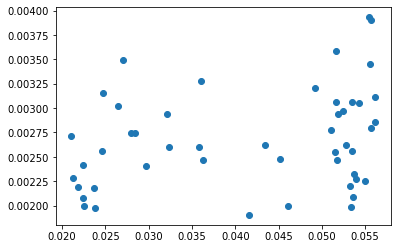

p-value = 1.4748036073940307e-10
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_12_	상관관계가 있다
p-value = 6.206518385256684e-10
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_17_	상관관계가 있다
p-value = 8.326604289685543e-06
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_20_	상관관계가 있다
p-value = 7.960745919616091e-16
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_21_	상관관계가 있다
p-value = 0.0002233834120439951
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_22_	상관관계가 있다
p-value = 1.9345642861428807e-08
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_23_	상관관계가 있다
p-value = 0.004778768662259057
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_2_	상관관계가 있다
p-value = 4.098679097007672e-16
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_31_	상관관계가 있다
p-value = 0.0001884845101676157
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_33_	상관관계가 있다
p-value = 3.41359372692221e-08
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_34_	상관관계가 있다
p-value = 0.012973068531941878
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_37_	상관관계가 있다
p-value = 7.39716960293151e-12
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_38_	상관관계가 있다
p-value = 0.0032524072007091877
[M.전문 과학 및 기술 서비스업 (70 ~ 73)]_3_	상관관계가 있다
p-value = 1.9060331069793808e

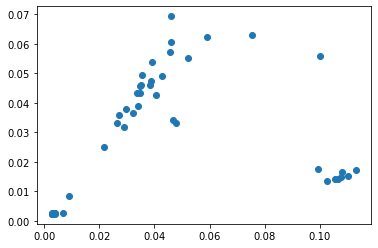

p-value = 5.032103505348932e-12
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_34_	상관관계가 있다
p-value = 3.1158430546556196e-07
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_3_	상관관계가 있다
p-value = 0.00017479335685363924
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_40_	상관관계가 있다
p-value = 5.8647431557916056e-08
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_45_	상관관계가 있다
p-value = 2.0999574587245116e-06
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_46_	상관관계가 있다
p-value = 1.1859308361638612e-14
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_47_	상관관계가 있다
p-value = 0.00025038676870473605
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_48_	상관관계가 있다
p-value = 2.1357576760977653e-12
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_50_	상관관계가 있다
p-value = 0.0005603351141574684
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_55_	상관관계가 있다
p-value = 8.931311301390693e-22
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_57_	상관관계가 있다
p-value = 2.2208059143387963e-24
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_59_	상관관계가 있다
p-value = 0.00016621269440287946
[N.사업시설관리 및 사업지원 서비스업 (74 ~ 75)]_5_	상관관계가 있다
p-value = 2.0065420512071412e-14
[N.사업시설관리 및 사업지원 서비스업 (7

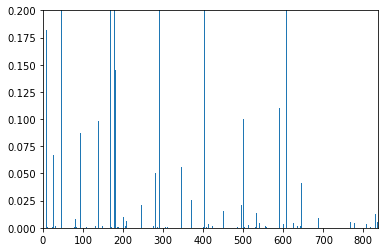

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)

def sorted_find(t_list, find_var) :
    max_var = len(t_list)
    found_index = []

    for i in range(len(t_list)) :
        if find_var in t_list[i] :
            found_index.append(i)
            max_var = i
        else :
            if i > max_var :
                break
    return found_index

ncols = ['excel'] + hours_str
t_model4 = pd.DataFrame(columns = ncols)
num_t = 0

barplot_x = []
barplot_y = []

for j in range(t_model3.shape[0]) :

#     print(t_model3.loc[j, 'excel'])
#     print(t_model4_day.loc[:, 'excel'].tolist()[ : 5])

    day_index = sorted_find(t_model4_day.loc[:, 'excel'].tolist(), t_model3.loc[j, 'excel'])
    end_index = sorted_find(t_model4_end.loc[:, 'excel'].tolist(), t_model3.loc[j, 'excel'])

#     print(day_index)
#     print(end_index)

    t_m3 = t_model3.loc[j, '1' :].tolist()
    t_day = t_model4_day.loc[day_index, :].copy()
    t_end = t_model4_end.loc[end_index, :].copy()
    t_day.reset_index(drop = True, inplace = True)
    t_end.reset_index(drop = True, inplace = True)

    all_y = []
#     print(f't_day = {t_day}\n')
#     print(f't_end = {t_end}\n')

    for k in range(1, 25) :
        temp_list = t_day.loc[:, f'{k}'].tolist()
        iqr_temp = IQR(temp_list)
        all_y.append(iqr_temp)

    for k in range(1, 25) :
        temp_list = t_end.loc[:, f'{k}'].tolist()
        iqr_temp = IQR(temp_list)
        all_y.append(iqr_temp)
    

    
    a, p = stats.pearsonr(t_m3, all_y)
    name = t_model3.loc[j, 'excel']
    
    print(f'p-value = {p}')
    if p < 0.05 :
        print(f'{name}\t상관관계가 있다')
    else :
        print(f'{name}\t상관관계가 없다')
        plt.scatter(t_m3, all_y)
        plt.xlabel('')
        plt.show()
        
    barplot_x.append(j)
    barplot_y.append(p)
    print(f'{j} done', end = '\r')

p_num = 0
for y in barplot_y :
    if y < 0.05 :
        p_num += 1
        
print(t_model3.shape[0], p_num)
plt.bar(barplot_x, barplot_y)
plt.xlim(0, t_model3.shape[0])
plt.ylim(0, 0.2)
plt.show()

    # t_m3 과 all_y 를 서로 correlation analysis로 확인(pearson 상관계수)



# # compare (model3 var - model4 iqr)

# for j in range(t_model3.shape[0]) :
#     temp_m3 = t_model3.loc[j, :]					   # make 1 builidng's model 3
#     temp_m3.reset_index(drop = True, inplace = True)

#     temp_m4 = pd.DataFrame(columns = t_model4.columns) # make 1 building's model 4
#     temp_num = 0

#     for k in range(t_model4.shape[0]) :
#         if temp_m3.loc[0, 'excel'] in t_model4.loc[k, 'excel'] :
#             temp_m4.loc[temp_num, :] = t_model4.loc[k, :]
#             temp_num += 1


#     all_x = t_model3.loc[j, '1' :].tolist()
#     all_y = []	

#     for k in range(1, 49) :
#         print(temp_m4.columns)
#         temp_list = temp_m4.loc[:, f'{k}'].tolist()
#         print(k)
#         print(temp_list)
#         iqr_temp = IQR(temp_list)
#         all_y.append(iqr_temp)

# #     print(f'all_x = {all_x}\n')
# #     print(f'all_y = {all_y}\n')

#     a, p = stats.pearson(all_x, all_y)
#     name = t_model3.loc[j, 'excel']
    
#     print(f'p-value = {p}')
#     if p < 0.05 :
#         print(f'{name}\t상관관계가 있다')
#     else :
#         print(f'{name}\t상관관계가 없다')

#     plt.scatter(all_x, all_y)
#     plt.show()








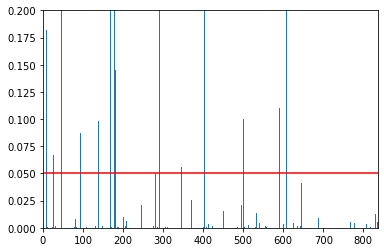

In [5]:

plt.bar(barplot_x, barplot_y)
plt.plot([0, t_model3.shape[0]], [0.05, 0.05], c = 'r')
plt.xlim(0, t_model3.shape[0])
plt.ylim(0, 0.2)
plt.show()

In [ ]:
print(782 / 835 * 100)